# Table of Contents



1. [Introduction](#1.0.-Introduction)

2. [Importing Libraries](#2.0.-Importing-Libraries)

3. [Loading Data](#3.0.-loading-data)

4. [Transforming Data](#4.0.-Transforming-Data)

5. [Splitting the Data](#5.0.-Splitting-the-Data)

6. [Saving the Data](#6.0.-Saving-the-Data)

7. [Summary](#7.0.-Summary)

## 1.0. Introduction

## 2.0. Importing Libraries

Loading the Necassary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
import pickle

## 3.0. Loading Data

In [2]:

# Load the data
df = pd.read_csv('joined_data_train.csv')


Checking my data before I start to transform it into a state that the machine model can work with.

In [3]:
df.head(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,vaccine_status
0,0,Not very concerned,No knowledge,Not on antiviral medications,Did not avoid,Did not wear mask,Did not wash hands,Did not avoid large gatherings,Left home,Touched face,...,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown,Not received,Not received,No Vaccines
1,1,Very concerned,A lot of knowledge,Not on antiviral medications,Avoided,Did not wear mask,Washed hands,Did not avoid large gatherings,Left home,Touched face,...,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,Not received,Received,Seasonal Vaccine Only


<Axes: >

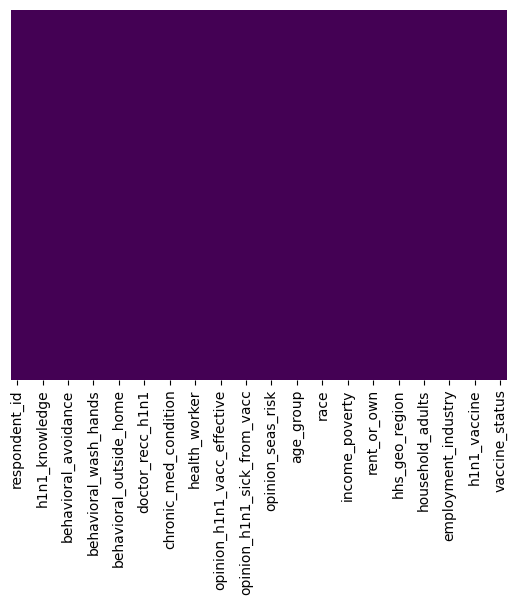

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 4.0. Transforming data

###     4.1.
In order for a Logistic model to understand the data the categorical features must be transformed. Here I am creating the dummy features from the categorical features but I will exclude a few of the columns that dont need to have indicator features or are the target features.

In [5]:
# Exclude columns before converting into dummy variables
columns_to_exclude = ['respondent_id','vaccine_status', 'h1n1_vaccine', 'seasonal_vaccine']
split_df = pd.get_dummies(df.drop(columns_to_exclude, axis=1) ,dtype= int)


In [6]:
split_df.head(2)

,h1n1_concern_Not at all concerned,h1n1_concern_Not very concerned,h1n1_concern_Somewhat concerned,h1n1_concern_Unknown,h1n1_concern_Very concerned,h1n1_knowledge_A little knowledge,h1n1_knowledge_A lot of knowledge,h1n1_knowledge_No knowledge,h1n1_knowledge_Unknown,behavioral_antiviral_meds_Not on antiviral medications,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
split_df['vaccine_status'] = df['vaccine_status']

In [8]:
class_counts = split_df['vaccine_status'].value_counts()
class_counts

vaccine_status
No Vaccines              13295
Seasonal Vaccine Only     7738
Both Vaccines             4697
H1N1 Vaccine Only          977
Name: count, dtype: int64

In [9]:
class_percentages = pd.Series([(x / split_df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    49.780956
1    28.973677
2    17.587149
3     3.658217
dtype: float64

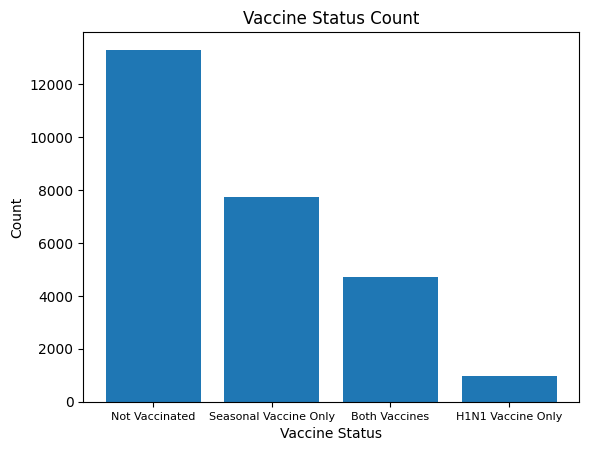

In [10]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts.values)
ax.set_xlabel('Vaccine Status')
ax.set_ylabel('Count')
ax.set_title('Vaccine Status Count')
ax.set_xticks([0, 1,2,3])
ax.set_xticklabels(['Not Vaccinated', 'Seasonal Vaccine Only', 'Both Vaccines', 'H1N1 Vaccine Only'], fontsize=8)
plt.show()

## 5.0. Splitting the Data

### 5.1.
Here I will split the dataframe into the training and testing sets. I have created separate sets for the h1n1 vaccine and the seasonal flu vaccine. If necessary I will go back and exclude one vaccine's data from the others but in my intial attempt I will leave it as one data set.

In [11]:
# this is the first splitting of my data. I split the data into 80% training and 20% testing. I will split it again in the next cell depending on the model results in my 
# next notebook.
#X_train, X_test, y_train, y_test = train_test_split(split_df.drop('vaccine_status', axis=1), split_df['vaccine_status'], test_size=0.2, random_state=42)

# this is the first splitting of my data. I split the data into 80% training and 20% testing. I will split it again in the next cell depending on the model results in my 
# next notebook.
X_train, X_test, y_train, y_test = train_test_split(split_df.drop('vaccine_status', axis=1), split_df['vaccine_status'], test_size=0.2, random_state=42, stratify=split_df['vaccine_status'])



## 6.0. Saving the Data

In [12]:
# Save the Serialized data with pickle

with open('x_train.pickle', 'wb') as file:
    pickle.dump(X_train, file)
with open('x_test.pickle', 'wb') as file:
    pickle.dump(X_test, file)
with open('y_train.pickle', 'wb') as file:
    pickle.dump(y_train, file)
with open('y_test.pickle', 'wb') as file:
    pickle.dump(y_test, file)


## 7.0. Summary 
To recap in this notebook I loaded the data from the EDA notebook, using dummy variables I changed the necessary categorical features. I then added back the columns that were not changed. Then I split the data into trainning and testing sets in an 80/20 split. I then saved serialized data with pickle to use in the modeling notebook.
